# Introduction to Statistical Learning
I shall be completing the applied exercises from Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani in these Jupyter Notebooks

# Chapter 4 Classification

13. This question should be answered using the Weekly data set, which
is part of the ISLR2 package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.
(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?
(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?
(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.
(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).
(e) Repeat (d) using LDA.
(f) Repeat (d) using QDA.
(g) Repeat (d) using KNN with K = 1.
(h) Repeat (d) using naive Bayes.
(i) Which of these methods appears to provide the best results on
this data?
(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.

14. In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.
(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables.
(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.
(c) Split the data into a training set and a test set.
(d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?
(e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?
(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?
(g) Perform naive Bayes on the training data in order to predict
mpg01 using the variables that seemed most associated with mpg01
in (b). What is the test error of the model obtained?
(h) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?
15. This problem involves writing functions.
(a) Write a function, Power(), that prints out the result of raising 2
to the 3rd power. In other words, your function should compute
23 and print out the results.
Hint: Recall that x^a raises x to the power a. Use the print()
function to output the result.
(b) Create a new function, Power2(), that allows you to pass any
two numbers, x and a, and prints out the value of x^a. You can
do this by beginning your function with the line
> Power2 <- function (x, a) {
You should be able to call your function by entering, for instance,
> Power2(3, 8)
on the command line. This should output the value of 38, namely,
6, 561.
(c) Using the Power2() function that you just wrote, compute 103,
817, and 1313.
(d) Now create a new function, Power3(), that actually returns the
result x^a as an R object, rather than simply printing it to the
screen. That is, if you store the value x^a in an object called
result within your function, then you can simply return() this return() result, using the following line:
return (result)
The line above should be the last line in your function, before
the } symbol.
(e) Now using the Power3() function, create a plot of f(x) = x2.
The x-axis should display a range of integers from 1 to 10, and
the y-axis should display x2. Label the axes appropriately, and
use an appropriate title for the figure. Consider displaying either
the x-axis, the y-axis, or both on the log-scale. You can do this
by using log = "x", log = "y", or log = "xy" as arguments to
the plot() function.
(f) Create a function, PlotPower(), that allows you to create a plot
of x against x^a for a fixed a and for a range of values of x. For
instance, if you call
> PlotPower(1:10, 3)
then a plot should be created with an x-axis taking on values
1, 2,..., 10, and a y-axis taking on values 13, 23,..., 103.
16. Using the Boston data set, fit classification models in order to predict
whether a given census tract has a crime rate above or below the median. Explore logistic regression, LDA, naive Bayes, and KNN models
using various subsets of the predictors. Describe your findings.
Hint: You will have to create the response variable yourself, using the
variables that are contained in the Boston data set

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up


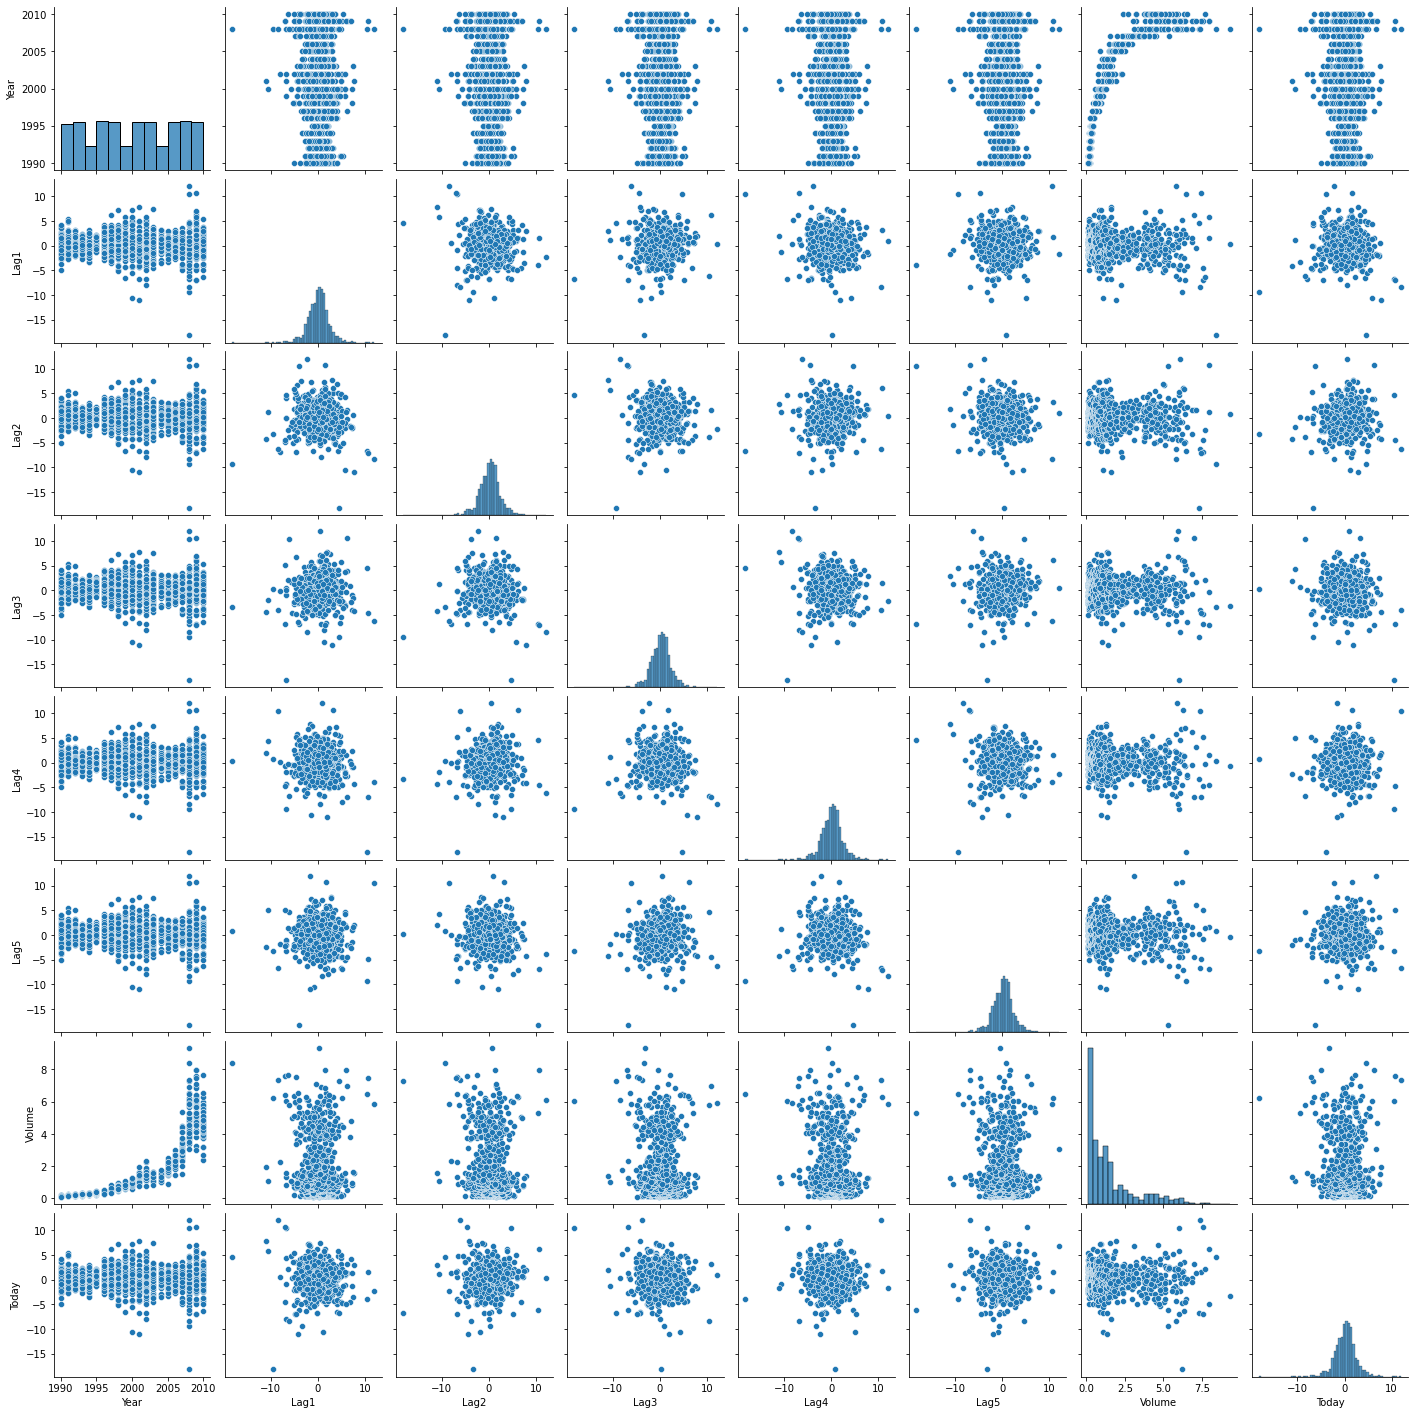

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import statsmodels.formula.api as smf
import statsmodels.api as sm

df = pd.read_csv("Datasets\Weekly.csv")
print(df.head())
sns.pairplot(df)

In [2]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


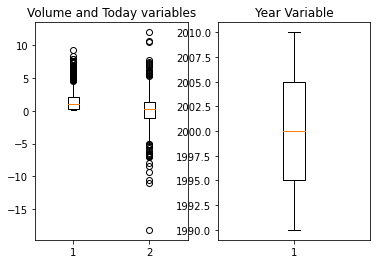

In [3]:
fig, axs = plt.subplots(1, 2)
axs[0].boxplot(df[['Volume','Today']])
axs[0].set_title('Volume and Today variables')
axs[1].boxplot(df[['Year']])
axs[1].set_title('Year Variable')
plt.show()

In [4]:
print(df['Direction'].value_counts())
df['Direction'].replace({'Up' : int(1), 'Down' : int(0)}, inplace = True)
res = sm.Logit.from_formula('Direction ~ Year + Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume + Today', data=df).fit()
res.summary()

Up      605
Down    484
Name: Direction, dtype: int64
         Current function value: 0.000000
         Iterations: 35


C:\Users\Curt\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Curt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Curt\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1080
Method:                           MLE   Df Model:                            8
Date:                Wed, 16 Feb 2022   Pseudo R-squ.:                   1.000
Time:                        16:33:06   Log-Likelihood:            -5.3623e-06
converged:                      False   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    105.8811   1.41e+06   7.53e-05      1.000   -2.76e+06    2.76e+06
Year          -0.0564    706.232  -7.98e-05      1.000   -1384.245    1384.133
Lag1          -5.0089   1232.704     -0.004      0.997   -2421.064    2411.047
Lag2           8.2144    846.331      0.010      0.992   -1650.565    1666.994
Lag3           1.3470    972.284      0.001      0.999   -1904.295    1906.989
Lag4          -0.2814    600.195     -0.000      1.000   -1176.642    1176.079
Lag5          11.0885   1008.494      0.011      0.991   -1965.523    1987.700
Volume         0.8491   4433.092      0.000      1.000   -8687.851    8689.549
Today        818.7290   2.83e+04      0.029      0.977   -5.46e+04    5.62e+04
==============================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [5]:
res.pred_table(0) 
#0 was an arbitrarily determined threshold - in future, would use sklearn to get an ROC curve to determine this threshold
#this is the confusion matrix for the regression

array([[317., 167.],
       [  0., 605.]])

In [6]:
dftrain = df[df['Year'] < 2009]

In [7]:
#The upcoming results require models not in statsmodels so I shall use sklearn

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression 

#getting direction back to its original form (bc sklearn can use it in this more intuitive form)  and then back again into the 0 1 form
#just to show how the previous renaming could have been done easier

print(dftrain.head())
actual_direction = LabelEncoder()

dftrain['Direction'].replace({int(1) : 'Up' , int(0) : 'Down'}, inplace = True)

dftrain['Direction'] = actual_direction.fit_transform(dftrain['Direction'])

print(dftrain.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270          0
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576          0
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514          1
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712          1
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178          1
   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270          0
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576          0
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514          1
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712          1
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178          1


C:\Users\Curt\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-7-1536b48f6660>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain['Direction'] = actual_direction.fit_transform(dftrain['Direction'])


In [8]:
#standardising the data so certain models arent affected
#sc = StandardScaler()
#dftrain = sc.fit_transform(dftrain)

print(dftrain.head())

print(dftrain['Lag2'])

X = np.array(dftrain['Lag2'])
y = dftrain['Direction']

#performing the logistic regression
#had to make X an array in order to reshape. had to reshape because it was complaining and suggested doing it
logres = LogisticRegression(random_state=0).fit(X.reshape(-1, 1), y)

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270          0
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576          0
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514          1
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712          1
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178          1
0       1.572
1       0.816
2      -0.270
3      -2.576
4       3.514
        ...  
980    -8.389
981    12.026
982    -2.251
983     0.418
984     0.926
Name: Lag2, Length: 985, dtype: float64


In [9]:
from sklearn.metrics import confusion_matrix

testdata = df[df['Year'] > 2008]
testdata_array = np.array(testdata['Lag2'])


testpredict = logres.predict(testdata_array.reshape(-1,1))
testtrue = np.array(testdata['Direction'])

print(confusion_matrix(testtrue, testpredict))

[[ 9 34]
 [ 5 56]]


In [10]:
#from my understanding the top left and bottom left are when the model is correct. True negatives top left. True positives bottom right
#false negative bottom left. false negative top right
#now we will repeat this process for other classification methods

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis().fit(X.reshape(-1,1), y)
testpredict = lda.predict(testdata_array.reshape(-1,1))
print(confusion_matrix(testtrue, testpredict))

[[ 9 34]
 [ 5 56]]


In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = LinearDiscriminantAnalysis().fit(X.reshape(-1,1), y)
testpredict = qda.predict(testdata_array.reshape(-1,1))
print(confusion_matrix(testtrue, testpredict))

[[ 9 34]
 [ 5 56]]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1).fit(X.reshape(-1,1), y)
testpredict = neigh.predict(testdata_array.reshape(-1,1))
print(confusion_matrix(testtrue, testpredict))

[[21 22]
 [30 31]]


In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X.reshape(-1,1), y)
testpredict = gnb.predict(testdata_array.reshape(-1,1))
print(confusion_matrix(testtrue, testpredict))

[[ 0 43]
 [ 0 61]]


In [15]:
#which ones require standardised variables? transform with this:
#sc = StandardScaler()
#dftrain = sc.fit_transform(dftrain)
#accordingly

In [16]:
#Q14

df = pd.read_csv("Datasets\Auto.csv")
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
medmpg = np.median(df['mpg'])

df['mpg01'] = (df['mpg'] > medmpg)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  mpg01  
0       1  chevrolet chevelle malibu  False  
1       1          buick skylark 320  False  
2       1         plymouth satellite  False  
3       1              amc rebel sst  False  
4       1                ford torino  False  


In [18]:
df['mpg01'].replace({True:1,False:0}, inplace=True)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  mpg01  
0       1  chevrolet chevelle malibu      0  
1       1          buick skylark 320      0  
2       1         plymouth satellite      0  
3       1              amc rebel sst      0  
4       1                ford torino      0  


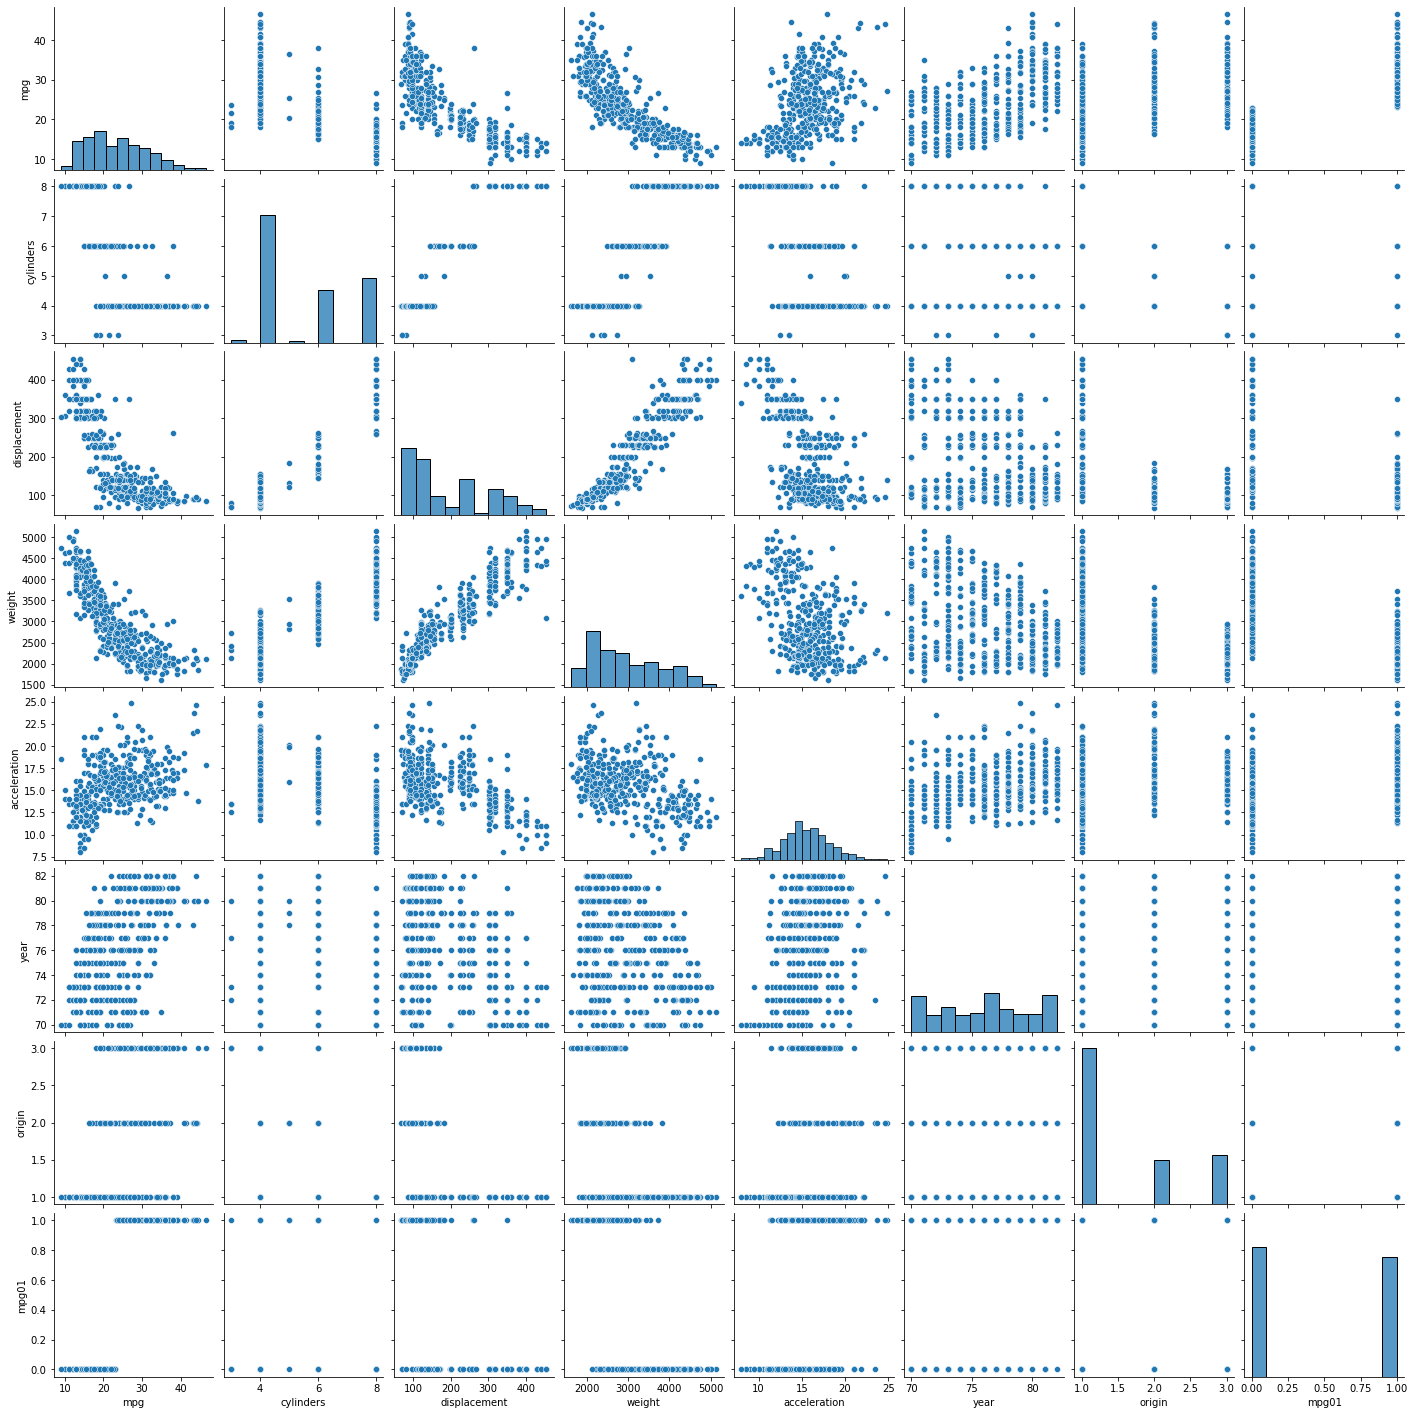

In [19]:
sns.pairplot(df)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['displacement','weight','acceleration']], df['mpg01'], test_size=0.33, random_state=42)

In [21]:
#performing LDA on this test/train split
testtrue = y_test
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
testpredict = lda.predict(X_test)
print(confusion_matrix(testtrue, testpredict))

[[44 19]
 [ 5 64]]


In [22]:
#performing QDA on this test/train split
testtrue = y_test
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
testpredict = qda.predict(X_test)
print(confusion_matrix(testtrue, testpredict))

[[51 12]
 [ 5 64]]


In [23]:
#rinse and repeat for other classification methods (Logistic, Naive Bayes, KNN)